In [435]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [436]:
import warnings
warnings.filterwarnings('ignore')

In [437]:
#Read data
bike_data = pd.read_csv('day.csv')

# Data Understanding and Preparation

In [438]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [439]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [440]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [441]:
bike_data.shape

(730, 16)

#### Conclusion:

 - There are 16 columns all have non null values
 - Few columns as instant , dteday , registered, casual is not useful
 - Few columns which are integer are categorical values, In EDA we will replace integer values with string for getting better insights

# EDA

##### Drop columns `instant , dteday , registered, casual`

In [442]:
bike_data=bike_data.drop(['instant', 'dteday', 'registered', 'casual'], axis=1)
bike_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

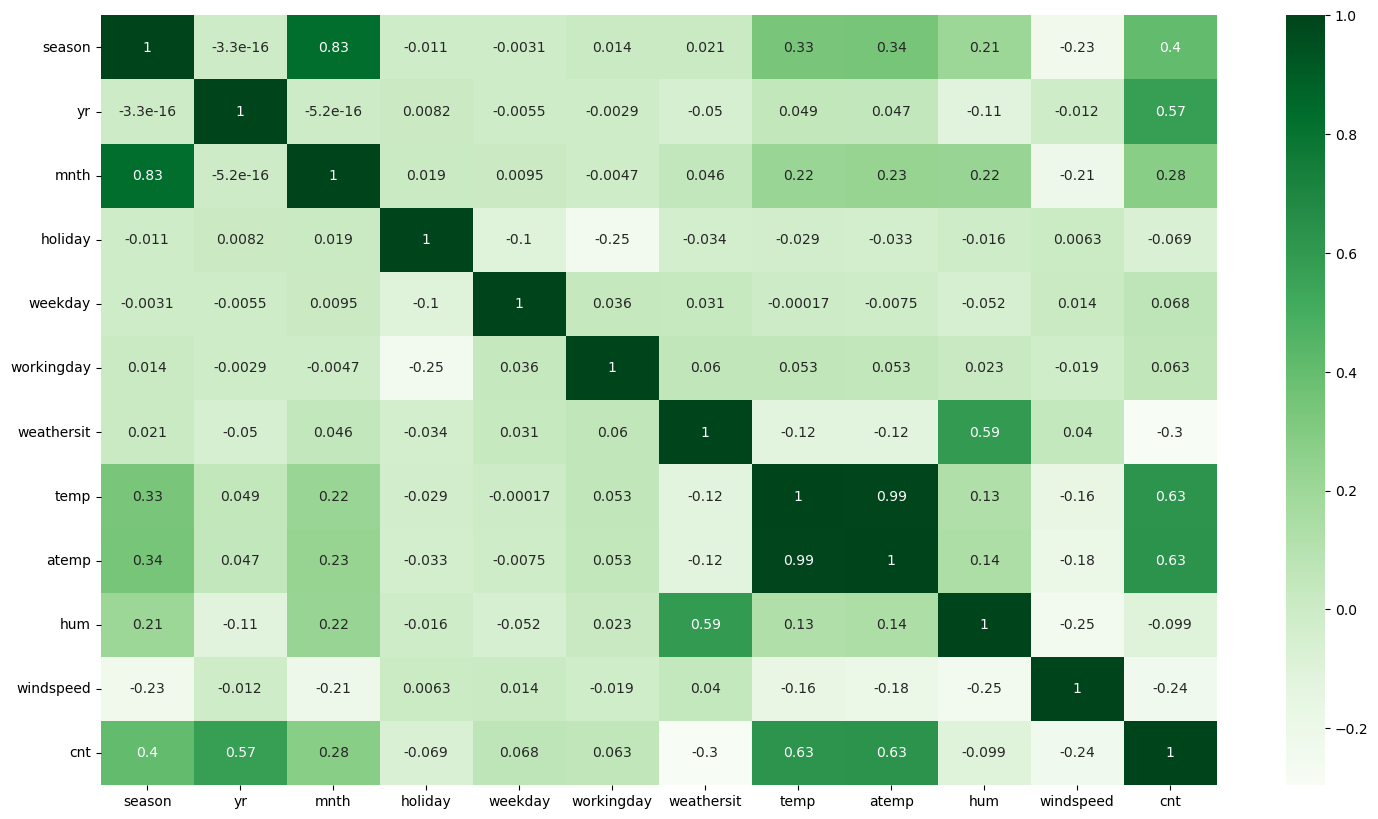

In [443]:
plt.figure(figsize = (18, 10))
sns.heatmap(bike_data.corr(), annot = True, cmap="Greens")
plt.show()

### Numerical columns:

`temp', 'atemp', 'hum', 'windspeed', 'cnt'`

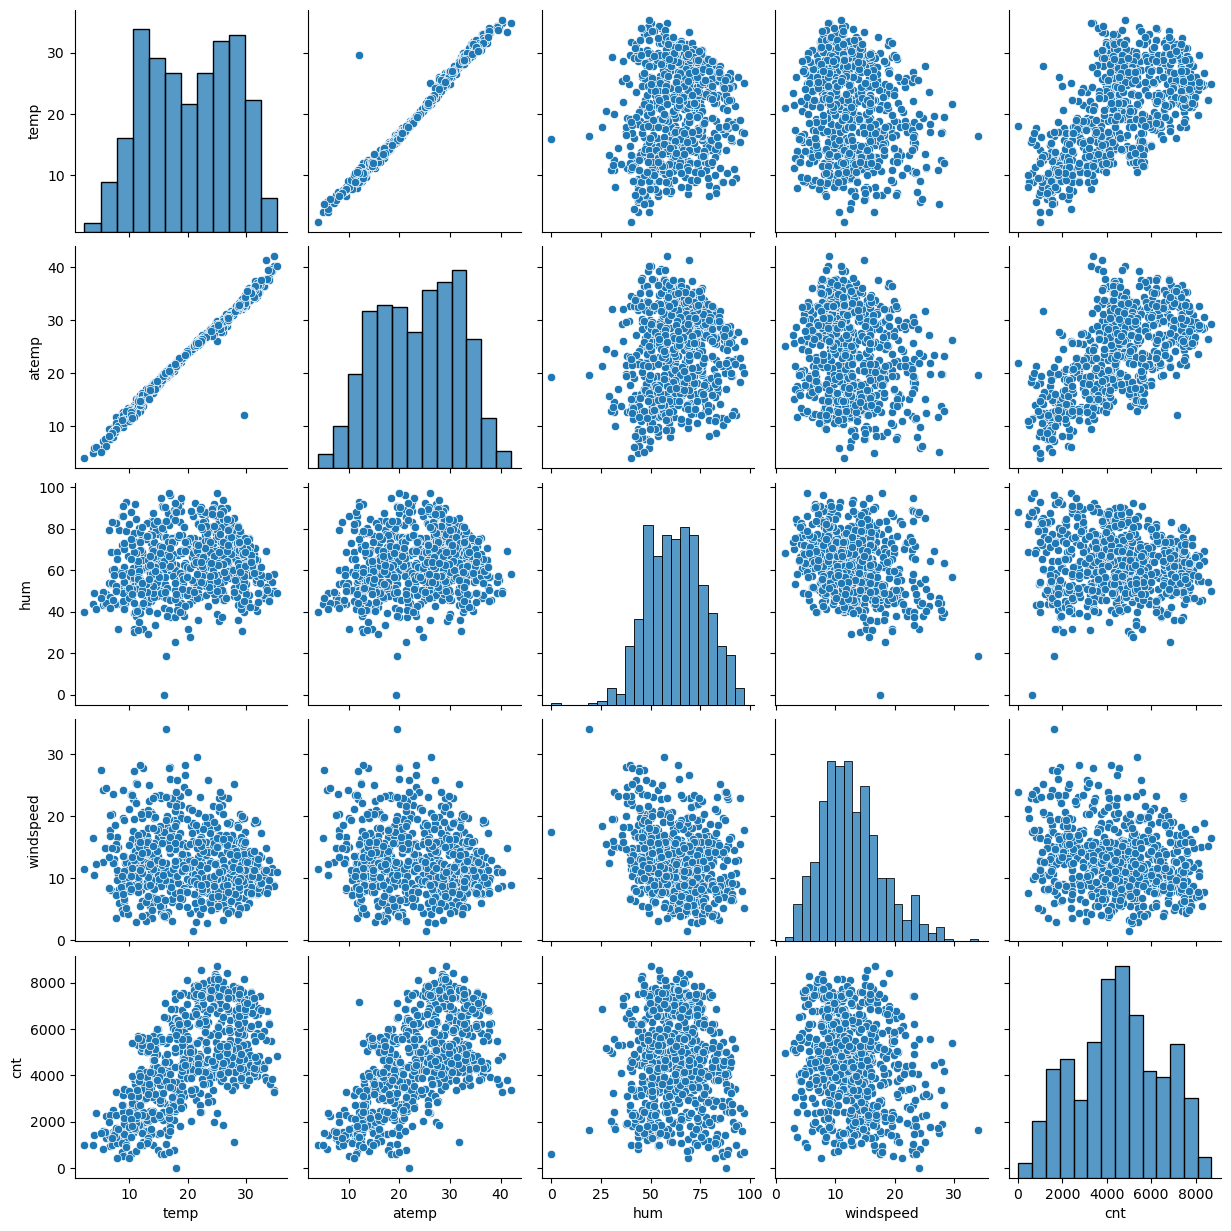

In [444]:
sns.pairplot(bike_data, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

### Categorical columns

##### `season,yr,mnth,holiday,weekday,workingday,weathersit` - These columns are categorical and need to be updated with string to gain insights

In [445]:
bike_data.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [446]:
bike_data['season'].replace({1:'Season_Spring', 2:'Season_Summer', 3:'Season_Fall', 4:'Season_Winter'}, inplace=True)
bike_data.season.value_counts()

season
Season_Fall      188
Season_Summer    184
Season_Spring    180
Season_Winter    178
Name: count, dtype: int64

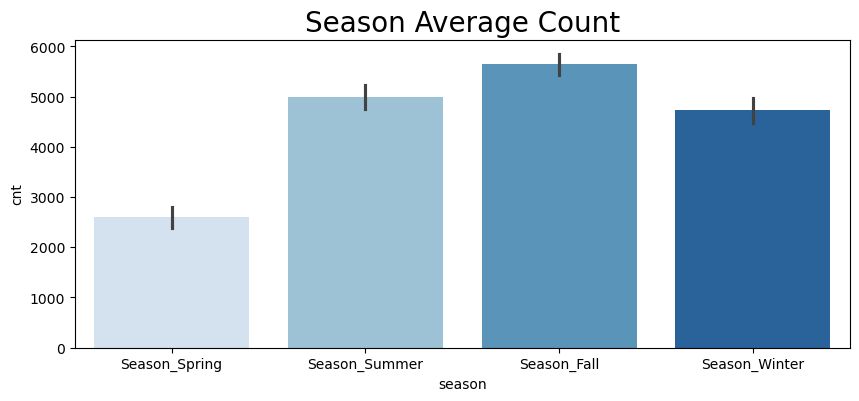

In [447]:
plt.figure(figsize=[10,4])
sns.barplot(x='season',y='cnt', data=bike_data, palette="Blues")
plt.title('Season Average Count', fontsize = 20)
plt.show()

In [448]:
bike_data['yr'].replace({0:'2018', 1:'2019'}, inplace=True)
bike_data.yr.value_counts()

yr
2018    365
2019    365
Name: count, dtype: int64

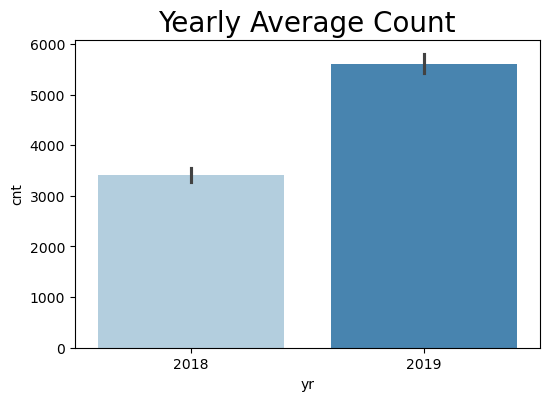

In [449]:
plt.figure(figsize=[6,4])
sns.barplot(x='yr',y='cnt', data=bike_data, palette="Blues")
plt.title('Yearly Average Count', fontsize = 20)
plt.show()

In [450]:
bike_data['mnth'].replace({1:'Mnth_Jan',2:'Mnth_Feb',3:'Mnth_Mar',4:'Mnth_April',
                                       5:'Mnth_May',6:'Mnth_June',7:'Mnth_July',8:'Mnth_Aug',
                                       9:'Mnth_Sept',10:'Mnth_Oct',11:'Mnth_Nov',12:'Mnth_Dec'}, inplace=True)
bike_data.mnth.value_counts()

mnth
Mnth_Jan      62
Mnth_Mar      62
Mnth_May      62
Mnth_July     62
Mnth_Aug      62
Mnth_Oct      62
Mnth_Dec      62
Mnth_April    60
Mnth_June     60
Mnth_Sept     60
Mnth_Nov      60
Mnth_Feb      56
Name: count, dtype: int64

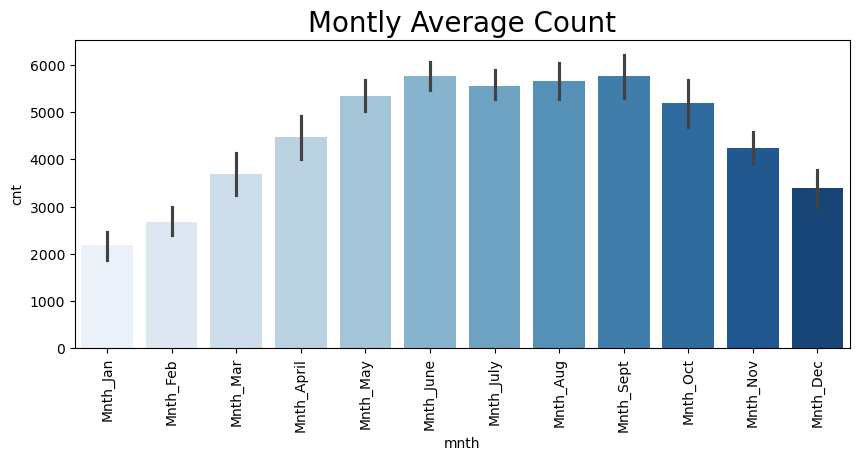

In [451]:
plt.figure(figsize=[10,4])
sns.barplot(x='mnth',y='cnt', data=bike_data, palette="Blues")
plt.title('Montly Average Count', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

In [452]:
bike_data['holiday'].replace({0:'No Holiday',1:'Holiday'}, inplace=True)
bike_data.holiday.value_counts()

holiday
No Holiday    709
Holiday        21
Name: count, dtype: int64

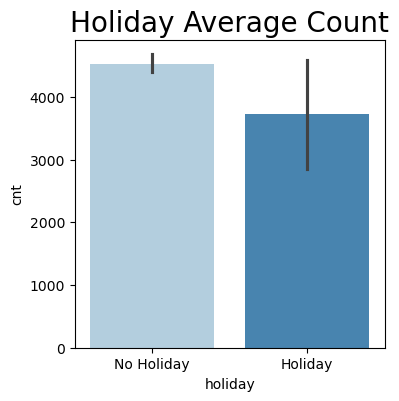

In [453]:
plt.figure(figsize=[4,4])
sns.barplot(x='holiday',y='cnt', data=bike_data, palette="Blues")
plt.title('Holiday Average Count', fontsize = 20)
plt.show()

In [454]:
bike_data['weekday'].replace({0:'WeekDay_Mon',1:'WeekDay_Tues',2:'WeekDay_Wed',3:'WeekDay_Thurs',4:'WeekDay_Fri',5:'WeekDay_Sat',6:'WeekDay_Sun'}, inplace=True)
bike_data.weekday.value_counts()

weekday
WeekDay_Sun      105
WeekDay_Mon      105
WeekDay_Tues     105
WeekDay_Wed      104
WeekDay_Fri      104
WeekDay_Sat      104
WeekDay_Thurs    103
Name: count, dtype: int64

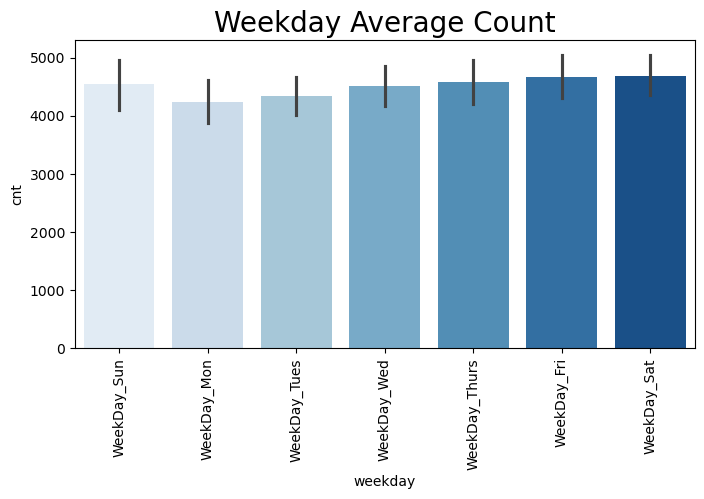

In [455]:
plt.figure(figsize=[8,4])
sns.barplot(x='weekday',y='cnt', data=bike_data, palette="Blues")
plt.title('Weekday Average Count', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

In [456]:
bike_data['workingday'].replace({0:'Holiday/Weekend',1:'Working'}, inplace=True)
bike_data.workingday.value_counts()

workingday
Working            499
Holiday/Weekend    231
Name: count, dtype: int64

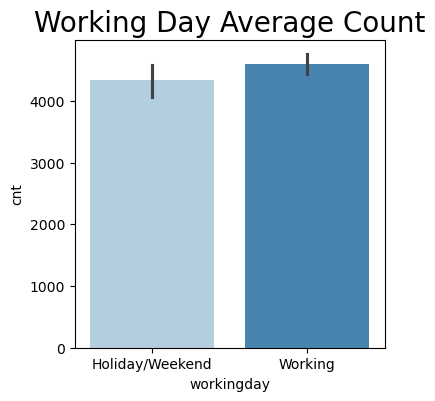

In [457]:
plt.figure(figsize=[4,4])
sns.barplot(x='workingday',y='cnt', data=bike_data, palette="Blues")
plt.title('Working Day Average Count', fontsize = 20)
plt.show()

In [458]:
bike_data['weathersit'].replace({1:"Weather_Good",2:"Weather_Moderate",3:"Weather_Bad",4:'Weather_Worse'},inplace=True)
bike_data.weathersit.value_counts()

weathersit
Weather_Good        463
Weather_Moderate    246
Weather_Bad          21
Name: count, dtype: int64

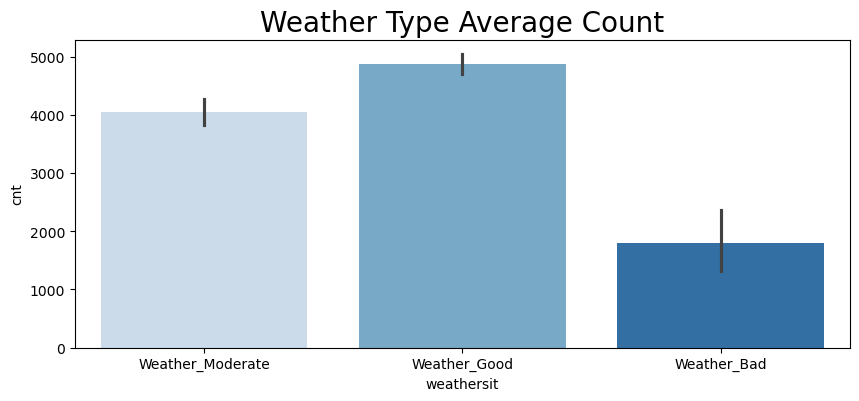

In [459]:
plt.figure(figsize=[10,4])
sns.barplot(x='weathersit',y='cnt', data=bike_data, palette="Blues")
plt.title('Weather Type Average Count', fontsize = 20)
plt.show()

#### EDA Conclusion:

 - Numerical value temp and atemp are lineraly corelated 
 - Season Summer, Fall and Winter has more bike rentered as compared to Spring
 - Year on year growth has almost dubled
 - Month May to Oct has more bike renting counts
 - Good Weather and Misty Cloudy weather are more suited for bike renting business
 - Weekday, Weekend, Holiday or Working does not impact bike renting business

# Data Preparation

In [460]:
bike_data['yr'].replace({'2018':0, '2019':1}, inplace=True)
bike_data['holiday'].replace({'No Holiday':0,'Holiday': 1}, inplace=True)
bike_data['workingday'].replace({'Holiday/Weekend':0,'Working':1}, inplace=True)

In [461]:
bike_data.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

#### Converting `season, mnth, weekday, weathersit` to dummy variable

In [462]:
season_data = pd.get_dummies(bike_data['season'], drop_first = True, dtype=int)
mnth_data = pd.get_dummies(bike_data['mnth'], drop_first = True, dtype=int)
weather_data = pd.get_dummies(bike_data['weekday'], drop_first = True, dtype=int)
weathersit_data = pd.get_dummies(bike_data['weathersit'], drop_first = True, dtype=int)

In [463]:
bike_data = pd.concat([bike_data, season_data], axis = 1)
bike_data = pd.concat([bike_data, mnth_data], axis = 1)
bike_data = pd.concat([bike_data, weather_data], axis = 1)
bike_data = pd.concat([bike_data, weathersit_data], axis = 1)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Mnth_Oct,Mnth_Sept,WeekDay_Mon,WeekDay_Sat,WeekDay_Sun,WeekDay_Thurs,WeekDay_Tues,WeekDay_Wed,Weather_Good,Weather_Moderate
0,Season_Spring,0,Mnth_Jan,0,WeekDay_Sun,0,Weather_Moderate,14.110847,18.18125,80.5833,...,0,0,0,0,1,0,0,0,0,1
1,Season_Spring,0,Mnth_Jan,0,WeekDay_Mon,0,Weather_Moderate,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,1
2,Season_Spring,0,Mnth_Jan,0,WeekDay_Tues,1,Weather_Good,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,1,0,1,0
3,Season_Spring,0,Mnth_Jan,0,WeekDay_Wed,1,Weather_Good,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,1,0
4,Season_Spring,0,Mnth_Jan,0,WeekDay_Thurs,1,Weather_Good,9.305237,11.46350,43.6957,...,0,0,0,0,0,1,0,0,1,0


In [464]:
# Drop 'furnishingstatus' as we have created the dummies for it

bike_data.drop(['season', 'mnth', 'weekday', 'weathersit'], axis = 1, inplace = True)
bike_data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'Season_Spring', 'Season_Summer', 'Season_Winter', 'Mnth_Aug',
       'Mnth_Dec', 'Mnth_Feb', 'Mnth_Jan', 'Mnth_July', 'Mnth_June',
       'Mnth_Mar', 'Mnth_May', 'Mnth_Nov', 'Mnth_Oct', 'Mnth_Sept',
       'WeekDay_Mon', 'WeekDay_Sat', 'WeekDay_Sun', 'WeekDay_Thurs',
       'WeekDay_Tues', 'WeekDay_Wed', 'Weather_Good', 'Weather_Moderate'],
      dtype='object')

In [465]:
bike_data.dtypes

yr                    int64
holiday               int64
workingday            int64
temp                float64
atemp               float64
hum                 float64
windspeed           float64
cnt                   int64
Season_Spring         int64
Season_Summer         int64
Season_Winter         int64
Mnth_Aug              int64
Mnth_Dec              int64
Mnth_Feb              int64
Mnth_Jan              int64
Mnth_July             int64
Mnth_June             int64
Mnth_Mar              int64
Mnth_May              int64
Mnth_Nov              int64
Mnth_Oct              int64
Mnth_Sept             int64
WeekDay_Mon           int64
WeekDay_Sat           int64
WeekDay_Sun           int64
WeekDay_Thurs         int64
WeekDay_Tues          int64
WeekDay_Wed           int64
Weather_Good          int64
Weather_Moderate      int64
dtype: object

# Splitting the Data into Training and Testing Sets

In [466]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_data, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features

In [467]:
bike_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Season_Spring,Season_Summer,...,Mnth_Oct,Mnth_Sept,WeekDay_Mon,WeekDay_Sat,WeekDay_Sun,WeekDay_Thurs,WeekDay_Tues,WeekDay_Wed,Weather_Good,Weather_Moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,1,0,0,1,0


In [468]:
bike_data.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Season_Spring,Season_Summer,...,Mnth_Oct,Mnth_Sept,WeekDay_Mon,WeekDay_Sat,WeekDay_Sun,WeekDay_Thurs,WeekDay_Tues,WeekDay_Wed,Weather_Good,Weather_Moderate
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,...,0.084932,0.082192,0.143836,0.142466,0.143836,0.141096,0.143836,0.142466,0.634247,0.336986
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,...,0.278971,0.274845,0.351164,0.349767,0.351164,0.348359,0.351164,0.349767,0.481971,0.473004
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [469]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train[num_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


# Dividing into X and Y sets for the model building

In [470]:
y_train = bike_train.pop('cnt')
X_train = bike_train

# Building a model

In [471]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [472]:
lm = LinearRegression()

In [473]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'Season_Spring', 'Season_Summer', 'Season_Winter', 'Mnth_Aug',
       'Mnth_Dec', 'Mnth_Feb', 'Mnth_Jan', 'Mnth_July', 'Mnth_June',
       'Mnth_Mar', 'Mnth_May', 'Mnth_Nov', 'Mnth_Oct', 'Mnth_Sept',
       'WeekDay_Mon', 'WeekDay_Sat', 'WeekDay_Sun', 'WeekDay_Thurs',
       'WeekDay_Tues', 'WeekDay_Wed', 'Weather_Good', 'Weather_Moderate'],
      dtype='object')

In [474]:
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=18)         
rfe = rfe.fit(X_train, y_train)

In [475]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Season_Spring', True, 1),
 ('Season_Summer', True, 1),
 ('Season_Winter', True, 1),
 ('Mnth_Aug', False, 5),
 ('Mnth_Dec', True, 1),
 ('Mnth_Feb', False, 2),
 ('Mnth_Jan', True, 1),
 ('Mnth_July', True, 1),
 ('Mnth_June', False, 11),
 ('Mnth_Mar', False, 12),
 ('Mnth_May', False, 3),
 ('Mnth_Nov', True, 1),
 ('Mnth_Oct', False, 8),
 ('Mnth_Sept', True, 1),
 ('WeekDay_Mon', True, 1),
 ('WeekDay_Sat', False, 9),
 ('WeekDay_Sun', True, 1),
 ('WeekDay_Thurs', False, 10),
 ('WeekDay_Tues', False, 6),
 ('WeekDay_Wed', False, 7),
 ('Weather_Good', True, 1),
 ('Weather_Moderate', True, 1)]

In [476]:
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'Season_Spring', 'Season_Summer', 'Season_Winter', 'Mnth_Dec',
       'Mnth_Jan', 'Mnth_July', 'Mnth_Nov', 'Mnth_Sept', 'WeekDay_Mon',
       'WeekDay_Sun', 'Weather_Good', 'Weather_Moderate'],
      dtype='object')

In [477]:
X_train.columns[~rfe.support_]

Index(['atemp', 'Mnth_Aug', 'Mnth_Feb', 'Mnth_June', 'Mnth_Mar', 'Mnth_May',
       'Mnth_Oct', 'WeekDay_Sat', 'WeekDay_Thurs', 'WeekDay_Tues',
       'WeekDay_Wed'],
      dtype='object')

## Building model using statsmodel, for the detailed statistics

In [478]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[rfe_col]

In [479]:
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [480]:
lm = sm.OLS(y_train,X_train_rfe1).fit()

In [481]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.2
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          9.55e-191
Time:                        18:51:02   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     492   BIC:                            -935.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0246      0.038  

In [482]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,97.41
15,WeekDay_Sun,22.82
14,WeekDay_Mon,22.01
16,Weather_Good,10.41
17,Weather_Moderate,8.95
6,Season_Spring,5.27
1,holiday,4.84
3,temp,4.43
8,Season_Winter,3.83
7,Season_Summer,2.76


#### From above we see that workingdayis having very high VIF. Moreover, as per of EDA we saw that working day does not have impact on bike rentals.

- Removing `workingday`

In [483]:
X_train_new = X_train_rfe.drop(["workingday"], axis = 1)

In [484]:
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Season_Spring',
       'Season_Summer', 'Season_Winter', 'Mnth_Dec', 'Mnth_Jan', 'Mnth_July',
       'Mnth_Nov', 'Mnth_Sept', 'WeekDay_Mon', 'WeekDay_Sun', 'Weather_Good',
       'Weather_Moderate'],
      dtype='object')

In [485]:
X_train_lm = sm.add_constant(X_train_new)

In [486]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [487]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.2
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          9.55e-191
Time:                        18:51:08   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     492   BIC:                            -935.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0634      0.047  

In [488]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,26.49
2,temp,25.19
15,Weather_Good,15.81
16,Weather_Moderate,9.27
5,Season_Spring,5.76
4,windspeed,4.69
7,Season_Winter,4.55
6,Season_Summer,3.28
0,yr,2.10
11,Mnth_Nov,1.89


#### From above we see that humidity having very high VIF. 
- Removing `humidity`

In [489]:
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Season_Spring',
       'Season_Summer', 'Season_Winter', 'Mnth_Dec', 'Mnth_Jan', 'Mnth_July',
       'Mnth_Nov', 'Mnth_Sept', 'WeekDay_Mon', 'WeekDay_Sun', 'Weather_Good',
       'Weather_Moderate'],
      dtype='object')

In [490]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [491]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.5
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          1.49e-188
Time:                        18:51:10   Log-Likelihood:                 515.89
No. Observations:                 510   AIC:                            -997.8
Df Residuals:                     493   BIC:                            -925.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0457      0.038  

In [492]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Weather_Good,15.80
2,temp,14.01
15,Weather_Moderate,8.81
3,windspeed,4.68
4,Season_Spring,4.42
6,Season_Winter,3.38
5,Season_Summer,2.76
0,yr,2.08
10,Mnth_Nov,1.87
8,Mnth_Jan,1.74


#### From above we see that Weather_Good and temp has very high VIF, but as per EDA temp has linear relationship with count of bike rented. Also Good weather is also positively associated with bike rentals. Hence retaining both variables

#### From above we see that weather_moderate having very high VIF and high p value. 
- Removing `Weather_Moderate`

In [493]:
X_train_new = X_train_new.drop(["Weather_Moderate"], axis = 1)

In [494]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     152.3
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          3.19e-174
Time:                        18:51:11   Log-Likelihood:                 478.93
No. Observations:                 510   AIC:                            -925.9
Df Residuals:                     494   BIC:                            -858.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1481      0.034      4.386

In [495]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.91
3,windspeed,4.63
4,Season_Spring,3.00
6,Season_Winter,2.89
14,Weather_Good,2.76
5,Season_Summer,2.21
0,yr,2.07
10,Mnth_Nov,1.80
8,Mnth_Jan,1.64
9,Mnth_July,1.60


#### Removing Mnth_Nov as it is having high p value

Removing `Mnth_Nov`

In [496]:
X_train_new = X_train_new.drop(["Mnth_Nov"], axis = 1)

In [497]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     162.4
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          9.31e-175
Time:                        18:51:12   Log-Likelihood:                 477.54
No. Observations:                 510   AIC:                            -925.1
Df Residuals:                     495   BIC:                            -861.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1348      0.033      4.106

In [498]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.85
3,windspeed,4.59
4,Season_Spring,3.00
13,Weather_Good,2.74
5,Season_Summer,2.21
0,yr,2.07
6,Season_Winter,2.05
8,Mnth_Jan,1.64
9,Mnth_July,1.60
10,Mnth_Sept,1.33


#### Removing WeekDay_Sun as it is having high p value

Removing `WeekDay_Sun`

In [499]:
X_train_new = X_train_new.drop(["WeekDay_Sun"], axis = 1)

In [500]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     174.8
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          1.16e-175
Time:                        18:51:14   Log-Likelihood:                 477.01
No. Observations:                 510   AIC:                            -926.0
Df Residuals:                     496   BIC:                            -866.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1369      0.033      4.179

In [501]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.81
3,windspeed,4.57
4,Season_Spring,2.98
12,Weather_Good,2.74
5,Season_Summer,2.21
0,yr,2.07
6,Season_Winter,2.04
8,Mnth_Jan,1.64
9,Mnth_July,1.60
10,Mnth_Sept,1.33


#### Removing Mnth_Dec as it is having high p value

Removing `Mnth_Dec`

In [502]:
X_train_new = X_train_new.drop(["Mnth_Dec"], axis = 1)

In [503]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     188.9
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          2.10e-176
Time:                        18:51:15   Log-Likelihood:                 476.04
No. Observations:                 510   AIC:                            -926.1
Df Residuals:                     497   BIC:                            -871.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1263      0.032      3.962

In [504]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.79
3,windspeed,4.56
4,Season_Spring,2.85
11,Weather_Good,2.73
5,Season_Summer,2.20
0,yr,2.07
6,Season_Winter,1.77
7,Mnth_Jan,1.60
8,Mnth_July,1.60
9,Mnth_Sept,1.33


#### Removing Mnth_Jan as it is having high p value

Removing `Mnth_Jan`

In [505]:
X_train_new = X_train_new.drop(["Mnth_Jan"], axis = 1)

In [506]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     205.0
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          6.55e-177
Time:                        18:51:16   Log-Likelihood:                 474.47
No. Observations:                 510   AIC:                            -924.9
Df Residuals:                     498   BIC:                            -874.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1119      0.031      3.626

In [507]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.77
3,windspeed,4.55
10,Weather_Good,2.73
5,Season_Summer,2.19
4,Season_Spring,2.14
0,yr,2.06
6,Season_Winter,1.77
7,Mnth_July,1.59
8,Mnth_Sept,1.32
9,WeekDay_Mon,1.18


#### Removing Season_Spring as it is having high p value

Removing `Season_Spring`

In [508]:
X_train_new = X_train_new.drop(["Season_Spring"], axis = 1)

In [509]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     221.6
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          2.02e-176
Time:                        18:51:18   Log-Likelihood:                 470.51
No. Observations:                 510   AIC:                            -919.0
Df Residuals:                     499   BIC:                            -872.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0412      0.018      2.320

In [510]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.67
3,windspeed,3.14
9,Weather_Good,2.59
0,yr,2.01
4,Season_Summer,1.75
6,Mnth_July,1.51
5,Season_Winter,1.43
7,Mnth_Sept,1.29
8,WeekDay_Mon,1.17
1,holiday,1.04


#### Removing Mnth_July as it is having high p value

Removing `Mnth_July`

In [511]:
X_train_new = X_train_new.drop(["Mnth_July"], axis = 1)

In [512]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     243.7
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          1.60e-176
Time:                        18:51:20   Log-Likelihood:                 467.90
No. Observations:                 510   AIC:                            -915.8
Df Residuals:                     500   BIC:                            -873.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0467      0.018      2.647

In [513]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.36
3,windspeed,3.10
8,Weather_Good,2.59
0,yr,2.00
4,Season_Summer,1.55
5,Season_Winter,1.34
6,Mnth_Sept,1.20
7,WeekDay_Mon,1.17
1,holiday,1.04


#### Now we cannot remove any variable as each of them are important and has VIF < 5 and p value is 0.000
#### Considering this as our final model let us validate our test data 

# Residual Analysis of the train data

Text(0.5, 0, 'Errors')

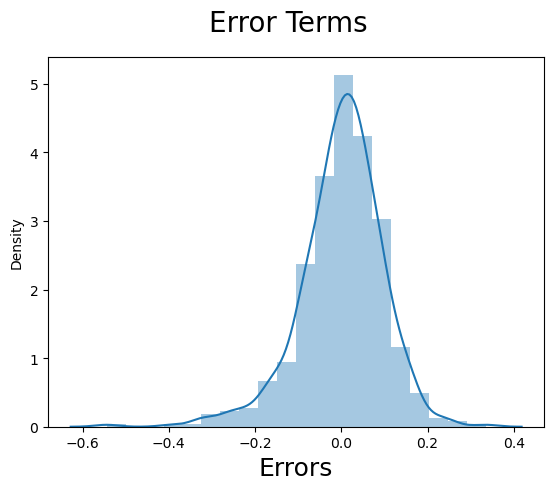

In [514]:
y_train_count = lm.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Conclusion: Residual plot is Normally Distributed, thereby approving our model 

# Making Predictions

##### Applying the scaling on the test sets

In [515]:
#from sklearn.preprocessing import MinMaxScaler
#scaler=MinMaxScaler()
#num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

bike_test[num_vars] = scaler.fit_transform(bike_test[num_vars])
bike_test[num_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.546312,0.530942,0.508750,0.418870,0.516216
std,0.249189,0.228159,0.201253,0.188111,0.238702
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.328479,0.333829,0.358469,0.283817,0.359882
50%,0.546045,0.547913,0.494200,0.402533,0.520241
75%,0.759735,0.720622,0.651165,0.524362,0.682487
max,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [516]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [517]:
X_train_lm.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'Season_Summer',
       'Season_Winter', 'Mnth_Sept', 'WeekDay_Mon', 'Weather_Good'],
      dtype='object')

In [518]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_lm = sm.add_constant(X_test_new)

X_test_lm.head()

,const,yr,holiday,temp,windspeed,Season_Summer,Season_Winter,Mnth_Sept,WeekDay_Mon,Weather_Good
184,1.0,0,1,0.837241,0.149393,0,0,0,0,0
535,1.0,1,0,0.911423,0.231142,1,0,0,0,1
299,1.0,0,0,0.496221,0.443398,0,1,0,0,0
221,1.0,0,0,0.890387,0.449707,0,0,0,0,1
152,1.0,0,0,0.821739,0.682387,1,0,0,0,1


In [519]:
# Making predictions using the final model (X_test_lm)

y_test_pred = lm.predict(X_test_lm)

# Model Evaluation

Text(0, 0.5, 'y_test_pred')

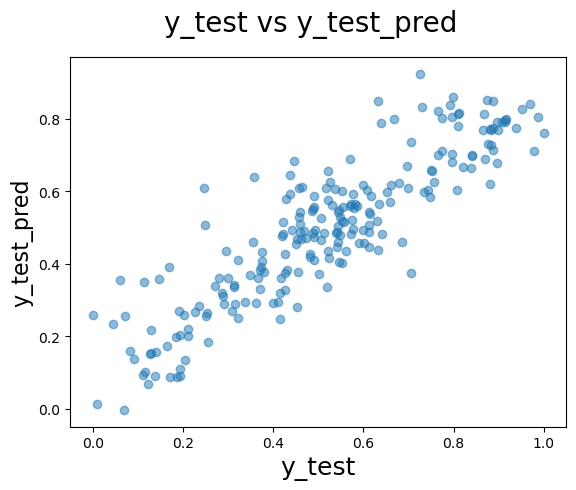

In [522]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)             
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred', fontsize = 16) 

#### Conclusion:
We can see that the equation of our best fitted line is:

demand_for shared_bike = 0.2364 *  yr - 0.1008 * holiday + 0.5419 * temp - 0.1758 * windspeed + 0.0888 * Season_Summer + 0.1232 * Season_Winter + 0.0959 * Mnth_Sept - 0.047 * Weekday_Mon + 0.0975 * Weather_good

Overall we have a decent model, but we also acknowledge that we could do better.

We have a couple of options:

Add new features 
 - windspeed/season
 - weather/season
Build a non-linear model

# Residaul Analysis

In [521]:
#r^2 test

from sklearn.metrics import r2_score

r2_test = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_count)

print('Test data r^2 :',round((r2_test*100),2))
print('Train data r^2 :',round((r2_train*100),2))

Test data r^2 : 77.32
Train data r^2 : 81.43


#### Conclusion

As we see that r^2 value for train and test data are almost in same range we can consider this model as final and can be used for further prediction to help company determine the demand